# Wrangling data and plotting

https://www.presidency.ucsb.edu/statistics/data/presidential-job-approval-all-data

## In this notebook:

1.  Take in and tidy the data
    - Change the type of dates.
    - Add each president's date of inauguration.
    - Add the number of days the president has been in office when the poll was taken.
2.  Aggregate the data to:
    - Get the mean approval rating of each president.
    - Get a moving average - the average approval rating of the president over the last n polls.
3.  Plot the approval ratings:
    - First plot for 1 president.
    - Then plot for all presidents.
    - Improve the aesthetics of the plot.


Based on the dataset 
https://docs.google.com/spreadsheets/d/1iEl565M1mICTubTtoxXMdxzaHzAcPTnb3kpRndsrfyY/edit?ts=5bd7f609#gid=671375968

## tidyverse

This package contains both dplyr and ggplot2, so it is very useful

### Piping

The sequence %>% is used to pipe commands together

### Projection

To select:
 - data %>% select(vbl1, vbl2,..., vbln)
 
### Selection
 
 To select:
 
 - data %>% filter(vbl1 == value)
 
 To extract 1 column, use 'pull'

In [1]:
library(tidyverse)
library(zoo)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




# 1. Take in and tidy the data

In [2]:
mydatasets = file.path('C:','Users','025312','Dropbox','City','pobyrne','Contents','Datasets')

In [3]:
dfsource <- file.path(mydatasets, "POTUS_approval.csv")
polls <- read.csv(dfsource, stringsAsFactors = F)

In [4]:
head(polls)

,President,Start.Date,End.Date,Approving,Disapproving,Unsure.NoData
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,Barack Obama,16/01/2017,19/01/2017,59,37,4
2,Barack Obama,09/01/2017,15/01/2017,57,39,4
3,Barack Obama,02/01/2017,08/01/2017,55,42,3
4,Barack Obama,26/12/2016,01/01/2017,55,40,5
5,Barack Obama,19/12/2016,25/12/2016,56,40,4
6,Barack Obama,12/12/2016,18/12/2016,56,40,4


In [5]:
str(polls)

'data.frame':	1305 obs. of  6 variables:
 $ President    : chr  "Barack Obama" "Barack Obama" "Barack Obama" "Barack Obama" ...
 $ Start.Date   : chr  "16/01/2017" "09/01/2017" "02/01/2017" "26/12/2016" ...
 $ End.Date     : chr  "19/01/2017" "15/01/2017" "08/01/2017" "01/01/2017" ...
 $ Approving    : int  59 57 55 55 56 56 57 54 56 56 ...
 $ Disapproving : int  37 39 42 40 40 40 40 43 40 41 ...
 $ Unsure.NoData: int  4 4 3 5 4 4 3 3 4 3 ...


In [6]:
polls$Start.Date <- as.Date(polls$Start.Date,"%d/%m/%Y")
polls$End.Date <- as.Date(polls$End.Date,"%d/%m/%Y")

In [7]:
polls<-polls %>% 
  rename(
    Date = Start.Date,
    EndDate = End.Date,
    Approve = Approving,
    Disapprove = Disapproving
    )

In [8]:
head(polls)

,President,Date,EndDate,Approve,Disapprove,Unsure.NoData
,<chr>,<date>,<date>,<int>,<int>,<int>
1,Barack Obama,2017-01-16,2017-01-19,59,37,4
2,Barack Obama,2017-01-09,2017-01-15,57,39,4
3,Barack Obama,2017-01-02,2017-01-08,55,42,3
4,Barack Obama,2016-12-26,2017-01-01,55,40,5
5,Barack Obama,2016-12-19,2016-12-25,56,40,4
6,Barack Obama,2016-12-12,2016-12-18,56,40,4


#### Now set the inauguration date for each of the presidents

In [9]:
# Initialize a new column value
polls$inaugurated<-dmy("01/01/1970")
# Set the correct value for each president (from the web)
polls$inaugurated[polls$President == "Donald Trump"]<-dmy("20/01/2017")
polls$inaugurated[polls$President == "Barack Obama"]<-dmy("20/01/2009")
polls$inaugurated[polls$President == "George W. Bush"]<-dmy("21/01/2001")
polls$inaugurated[polls$President == "William J. Clinton"]<-dmy("21/01/1993")
polls$inaugurated[polls$President == "George Bush"]<-dmy("21/01/1989")
polls$inaugurated[polls$President == 'Ronald Reagan']<-dmy("21/01/1981")

unique(polls[,c('President','inaugurated')])

,President,inaugurated
,<chr>,<date>
1,Barack Obama,2009-01-20
419,Ronald Reagan,1981-01-21
554,George Bush,1989-01-21
667,William J. Clinton,1993-01-21
883,George W. Bush,2001-01-21
1165,Donald Trump,2017-01-20


In [10]:
# Calculate the number of days the president has been in office when the poll was taken.

polls$Days <- polls$Date - polls$inaugurated

In [11]:
str(polls)

'data.frame':	1305 obs. of  8 variables:
 $ President    : chr  "Barack Obama" "Barack Obama" "Barack Obama" "Barack Obama" ...
 $ Date         : Date, format: "2017-01-16" "2017-01-09" ...
 $ EndDate      : Date, format: "2017-01-19" "2017-01-15" ...
 $ Approve      : int  59 57 55 55 56 56 57 54 56 56 ...
 $ Disapprove   : int  37 39 42 40 40 40 40 43 40 41 ...
 $ Unsure.NoData: int  4 4 3 5 4 4 3 3 4 3 ...
 $ inaugurated  : Date, format: "2009-01-20" "2009-01-20" ...
 $ Days         : 'difftime' num  2918 2911 2904 2897 ...
  ..- attr(*, "units")= chr "days"


## 2. Aggregation

grouping is done using group_by(variable)

Summarising functions include mean(), median()

In [12]:
Avgpolls <- polls%>% 
    group_by(President) %>%
    summarise(MeanApproval = mean(Approve)) 
Avgpolls

President,MeanApproval
<chr>,<dbl>
Barack Obama,47.96890
Donald Trump,40.38298
George Bush,61.41593
George W. Bush,51.34752
Ronald Reagan,52.23704
William J. Clinton,55.49074


In [13]:
Avgpolls %>%     pull(MeanApproval)

[1] 47.96890 40.38298 61.41593 51.34752 52.23704 55.49074

### Getting moving averages

This is an average over a time frame time. 

In [14]:
TrumpPolls <-polls %>%
    select(President, Date, Approve, Disapprove) %>%
    filter (President == "Donald Trump") %>%
  arrange(Date) 
head(TrumpPolls)

,President,Date,Approve,Disapprove
,<chr>,<date>,<int>,<int>
1,Donald Trump,2017-01-20,45,47
2,Donald Trump,2017-01-30,43,52
3,Donald Trump,2017-02-06,41,53
4,Donald Trump,2017-02-13,40,54
5,Donald Trump,2017-02-20,42,53
6,Donald Trump,2017-02-27,43,51


To compute moving averages, sort the data by date. Then  take the mean of all the previous data within a certain window — say, 10 polls. Then, do the same for every observation  between starting day x and end day y. 

The zoo package provides the rollmean() function, which iterates over every row in your data and averages the last x observations of variable y. In this case, the rollmean() function would take an average of the president's approval for every previous x, polls. We specify the variable we want, in this case, named Approve, the number of observations to average, whether or not to fill the rows between one and x variables with NA, and whether or not we should average "up" or "down" the data frame.


In [15]:
TrumpApprove<-TrumpPolls %>%
    mutate(AvgApprove = rollmean(Approve, 10, na.pad=TRUE, align="right"))
# Note, because we're averaging over the last 10 polls, AvgApprove has no value for the first 10 rows.
head(TrumpApprove,15)

,President,Date,Approve,Disapprove,AvgApprove
,<chr>,<date>,<int>,<int>,<dbl>
1,Donald Trump,2017-01-20,45,47,NA
2,Donald Trump,2017-01-30,43,52,NA
3,Donald Trump,2017-02-06,41,53,NA
4,Donald Trump,2017-02-13,40,54,NA
5,Donald Trump,2017-02-20,42,53,NA
6,Donald Trump,2017-02-27,43,51,NA
7,Donald Trump,2017-03-06,42,52,NA
8,Donald Trump,2017-03-13,40,55,NA
9,Donald Trump,2017-03-20,39,56,NA


In [16]:
# We're not interested in the first 10 rows.
TrumpApprove <- drop_na(TrumpApprove)

In [17]:
summary(TrumpApprove)

  President              Date               Approve       Disapprove   
 Length:132         Min.   :2017-03-27   Min.   :34.0   Min.   :45.00  
 Class :character   1st Qu.:2017-11-11   1st Qu.:38.0   1st Qu.:54.00  
 Mode  :character   Median :2018-06-28   Median :40.0   Median :55.00  
                    Mean   :2018-09-02   Mean   :40.3   Mean   :55.07  
                    3rd Qu.:2019-05-04   3rd Qu.:42.0   3rd Qu.:57.00  
                    Max.   :2021-01-04   Max.   :49.0   Max.   :62.00  
   AvgApprove   
 Min.   :36.50  
 1st Qu.:38.40  
 Median :40.60  
 Mean   :40.30  
 3rd Qu.:41.62  
 Max.   :46.80  

In [18]:
head(polls)

,President,Date,EndDate,Approve,Disapprove,Unsure.NoData,inaugurated,Days
,<chr>,<date>,<date>,<int>,<int>,<int>,<date>,<drtn>
1,Barack Obama,2017-01-16,2017-01-19,59,37,4,2009-01-20,2918 days
2,Barack Obama,2017-01-09,2017-01-15,57,39,4,2009-01-20,2911 days
3,Barack Obama,2017-01-02,2017-01-08,55,42,3,2009-01-20,2904 days
4,Barack Obama,2016-12-26,2017-01-01,55,40,5,2009-01-20,2897 days
5,Barack Obama,2016-12-19,2016-12-25,56,40,4,2009-01-20,2890 days
6,Barack Obama,2016-12-12,2016-12-18,56,40,4,2009-01-20,2883 days


In [19]:
AllApprove <- polls %>%
    group_by(President) %>%
    mutate(AvgApprove = rollmean(Approve, 10, na.pad=TRUE, align="right")) %>%
    drop_na()
AllApprove$Days<-as.numeric(AllApprove$Days)
summary(AllApprove)

  President              Date               EndDate              Approve     
 Length:1251        Min.   :1981-01-30   Min.   :1981-02-02   Min.   :27.00  
 Class :character   1st Qu.:1996-03-11   1st Qu.:1996-03-13   1st Qu.:43.00  
 Mode  :character   Median :2005-11-11   Median :2005-11-13   Median :49.00  
                    Mean   :2004-05-19   Mean   :2004-05-23   Mean   :50.88  
                    3rd Qu.:2013-05-30   3rd Qu.:2013-06-05   3rd Qu.:58.00  
                    Max.   :2020-06-08   Max.   :2020-06-30   Max.   :90.00  
   Disapprove    Unsure.NoData    inaugurated              Days       
 Min.   : 6.00   Min.   : 1.00   Min.   :1981-01-21   Min.   :  -1.0  
 1st Qu.:35.00   1st Qu.: 4.00   1st Qu.:1993-01-21   1st Qu.: 551.5  
 Median :45.00   Median : 6.00   Median :2001-01-21   Median :1091.0  
 Mean   :42.43   Mean   : 6.69   Mean   :2001-01-08   Mean   :1226.2  
 3rd Qu.:51.00   3rd Qu.: 8.00   3rd Qu.:2009-01-20   3rd Qu.:1899.0  
 Max.   :69.00   Max.   :43.

## 3. Plot the approval ratings

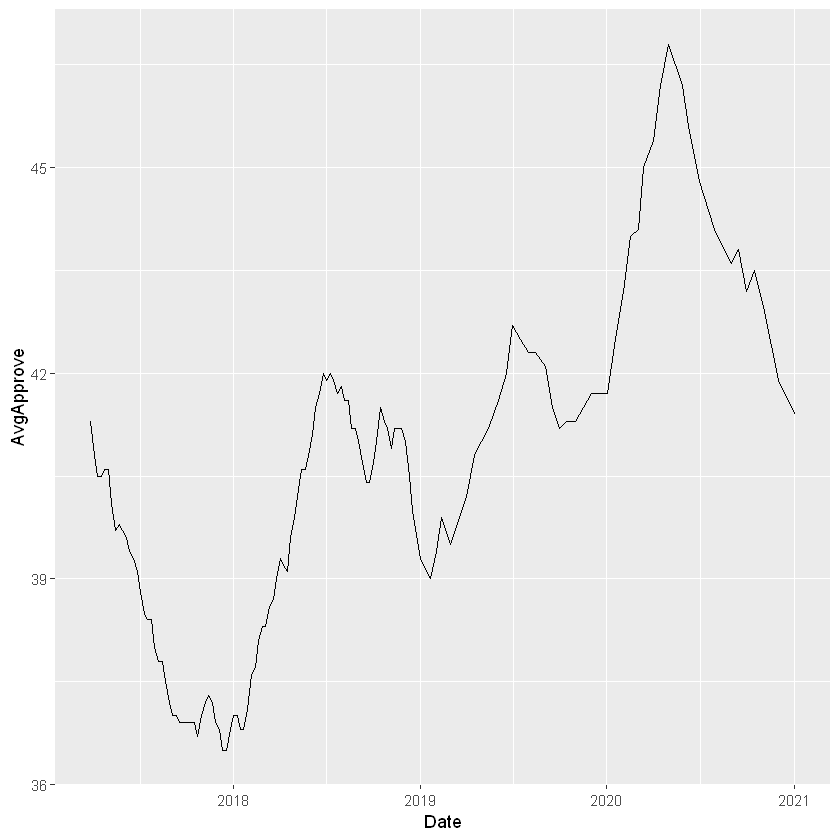

In [20]:
ggplot(data = TrumpApprove, aes(x=Date,y=AvgApprove)) + 
  geom_line()

In [21]:
g<-ggplot(data = AllApprove, aes(x=as.numeric(Days), y=AvgApprove, col=President)) + 
     geom_line(linewidth=1) +
     theme_classic()

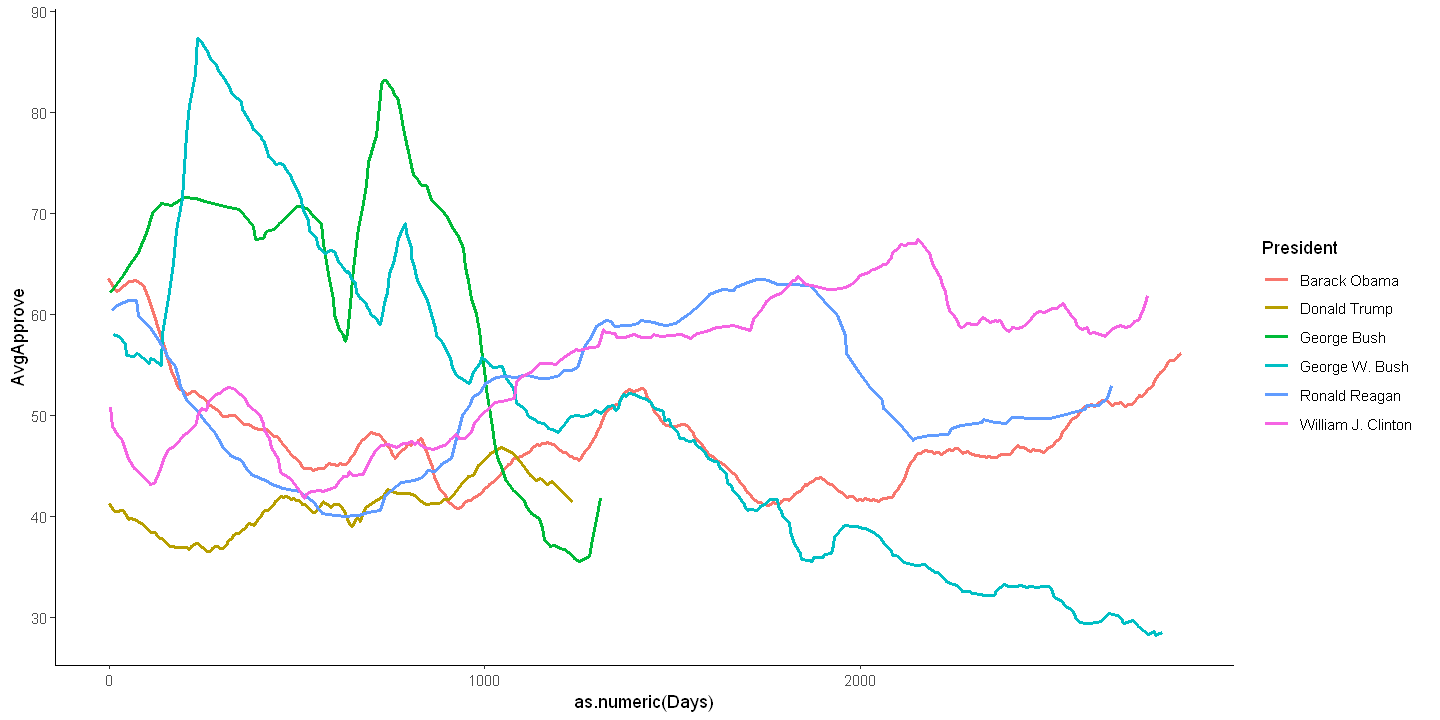

In [22]:
options(repr.plot.width=12, repr.plot.height=6)#Make the plot wide enough to see!
g

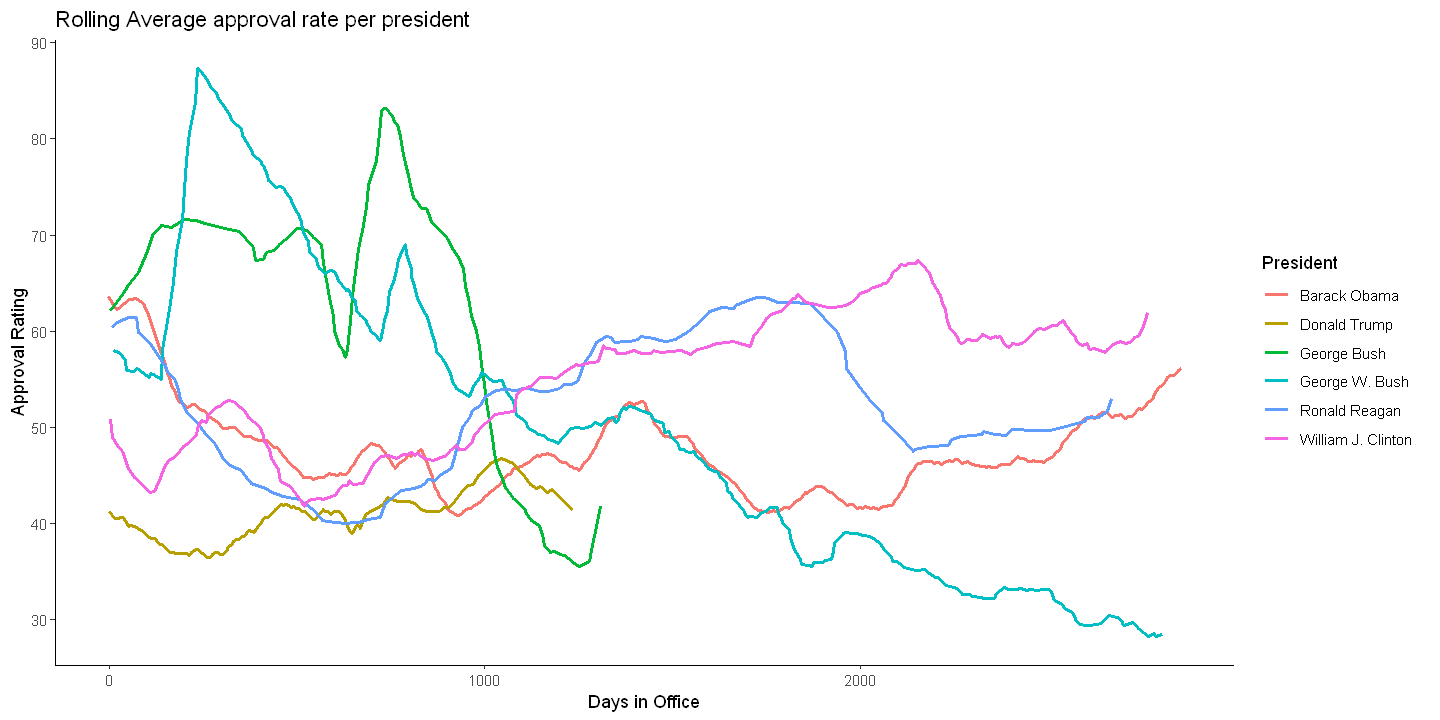

In [23]:

g = g +   labs( x="Days in Office", 
               y="Approval Rating", 
               title="Rolling Average approval rate per president") 
g

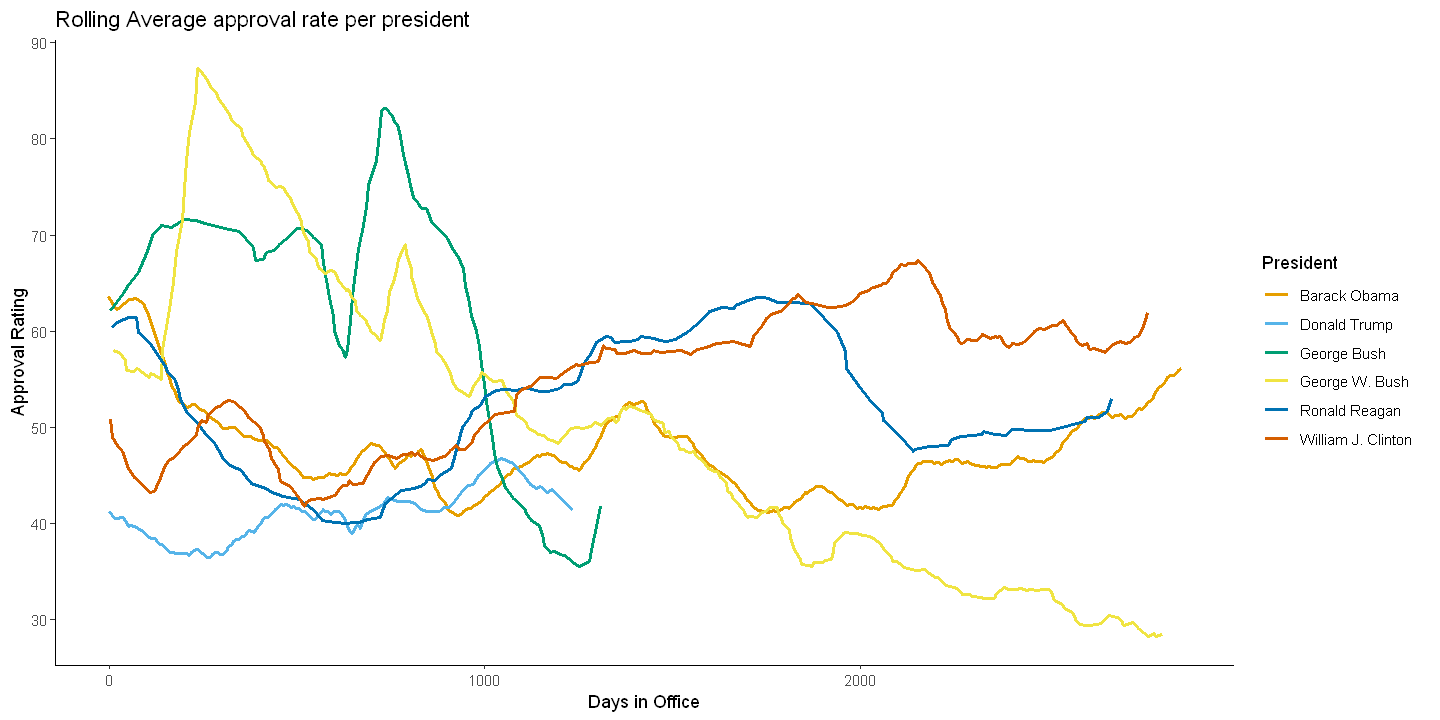

In [24]:
cbPalette <- c( "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
g = g +  scale_colour_manual(values=cbPalette)
g

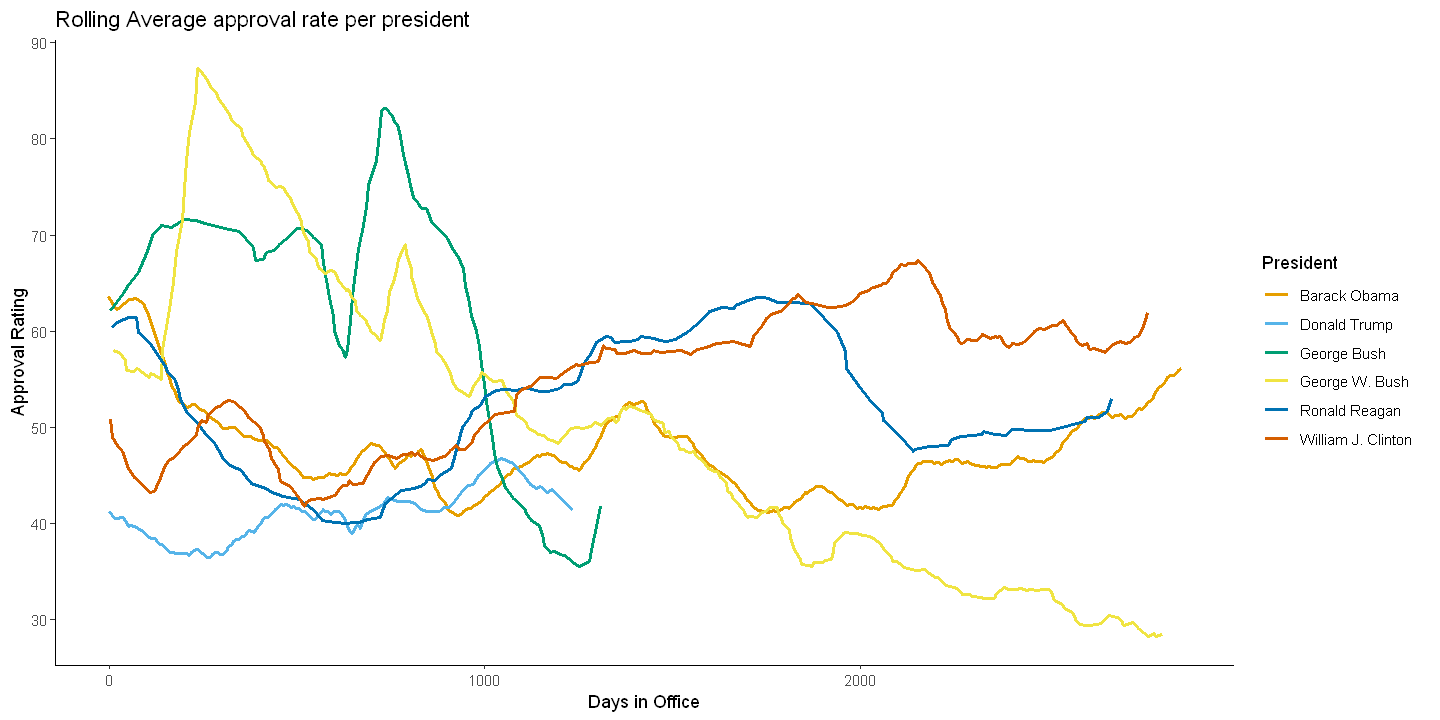

In [25]:
g = g + guides(color = guide_legend(override.aes = list(size = 3)))
g

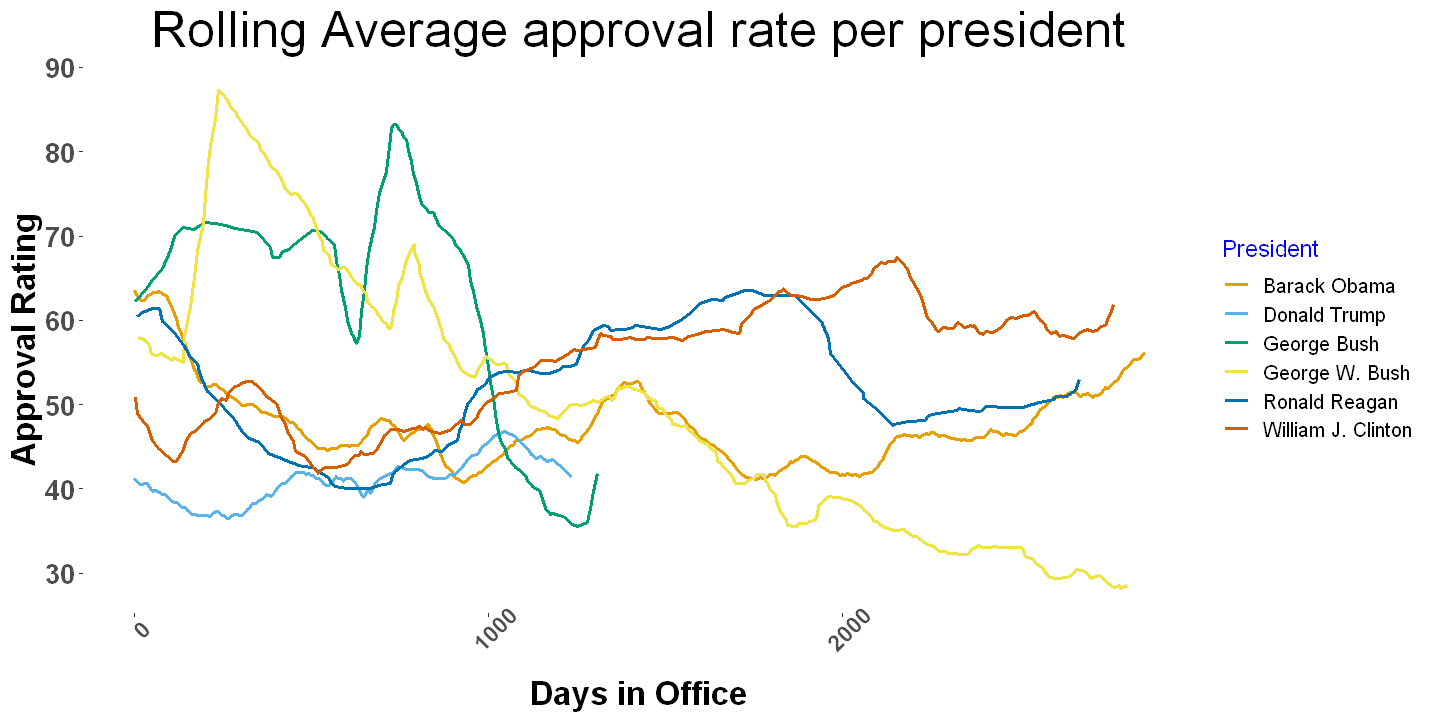

In [26]:
g =g + theme(
    axis.text.x  = element_text(face="bold", size=14, angle=45),
    axis.text.y  = element_text(face="bold", size=16, angle=0),
    axis.title   = element_text(size=20,face="bold"),
    plot.title   = element_text(size=30, hjust=0.5),
    legend.title = element_text(color = "blue", size = 14),
    legend.text  = element_text(color = "black", size = 12),
    axis.line    = element_blank()
        )
g

In [27]:
maxDays<-as.numeric(polls%>% summarise(maxDays = max(Days)))

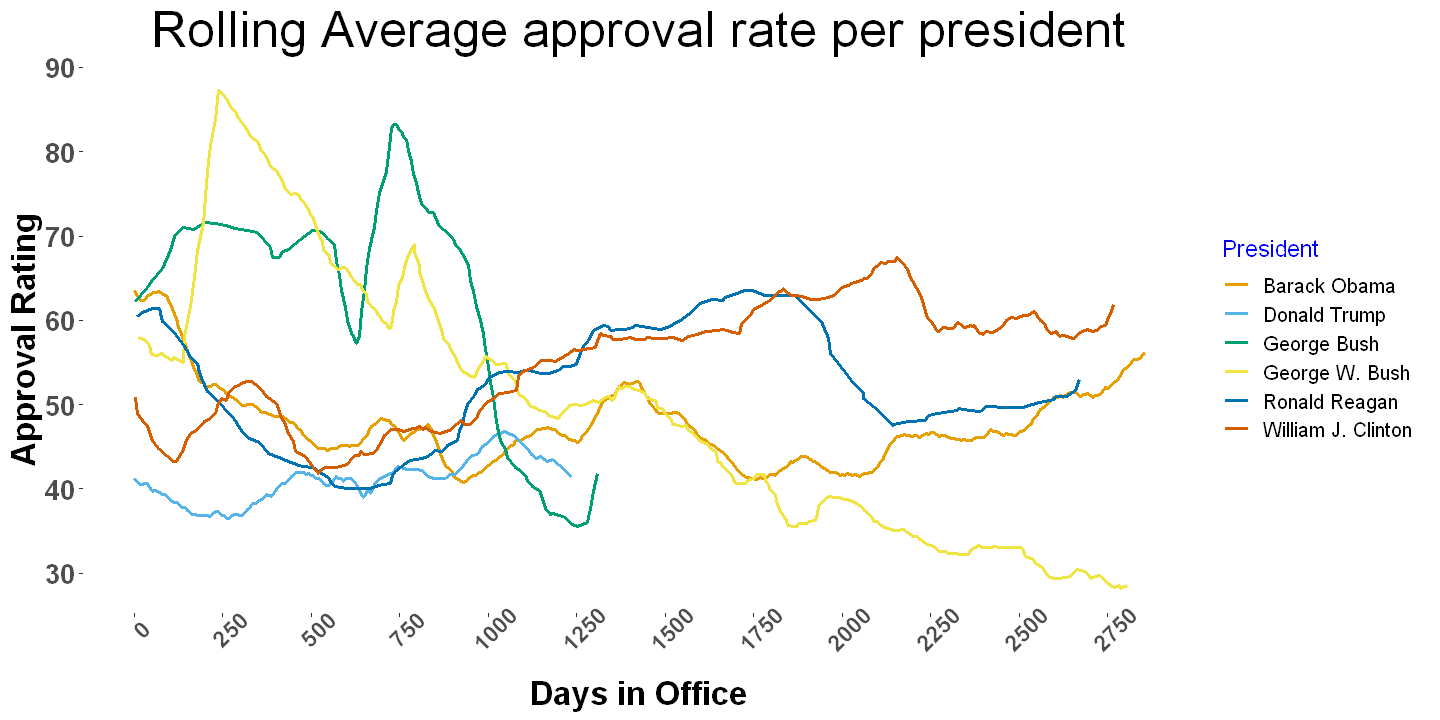

In [28]:
g =  g + scale_x_continuous(name="Days in Office",breaks=seq(0,maxDays,250))
g

In [29]:

ClintonApprove <-AllApprove %>% filter(President=="William J. Clinton") 
WBushApprove <-AllApprove %>% filter(President=="George W. Bush") 

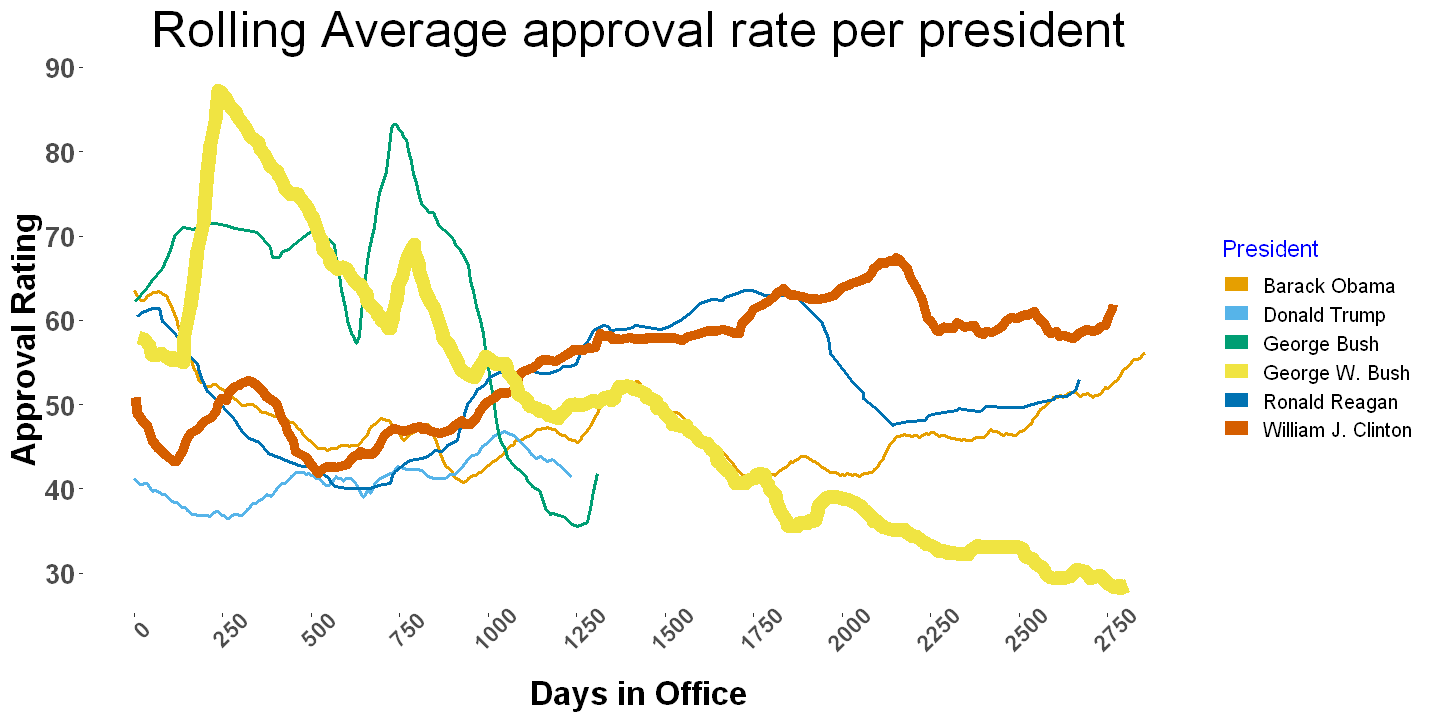

In [30]:
g=g + geom_line(data=ClintonApprove, aes(x=Days, y=AvgApprove, col=President), linewidth=3) + 
    geom_line(data=WBushApprove, aes(x=Days, y=AvgApprove, col=President), linewidth=4) 
g

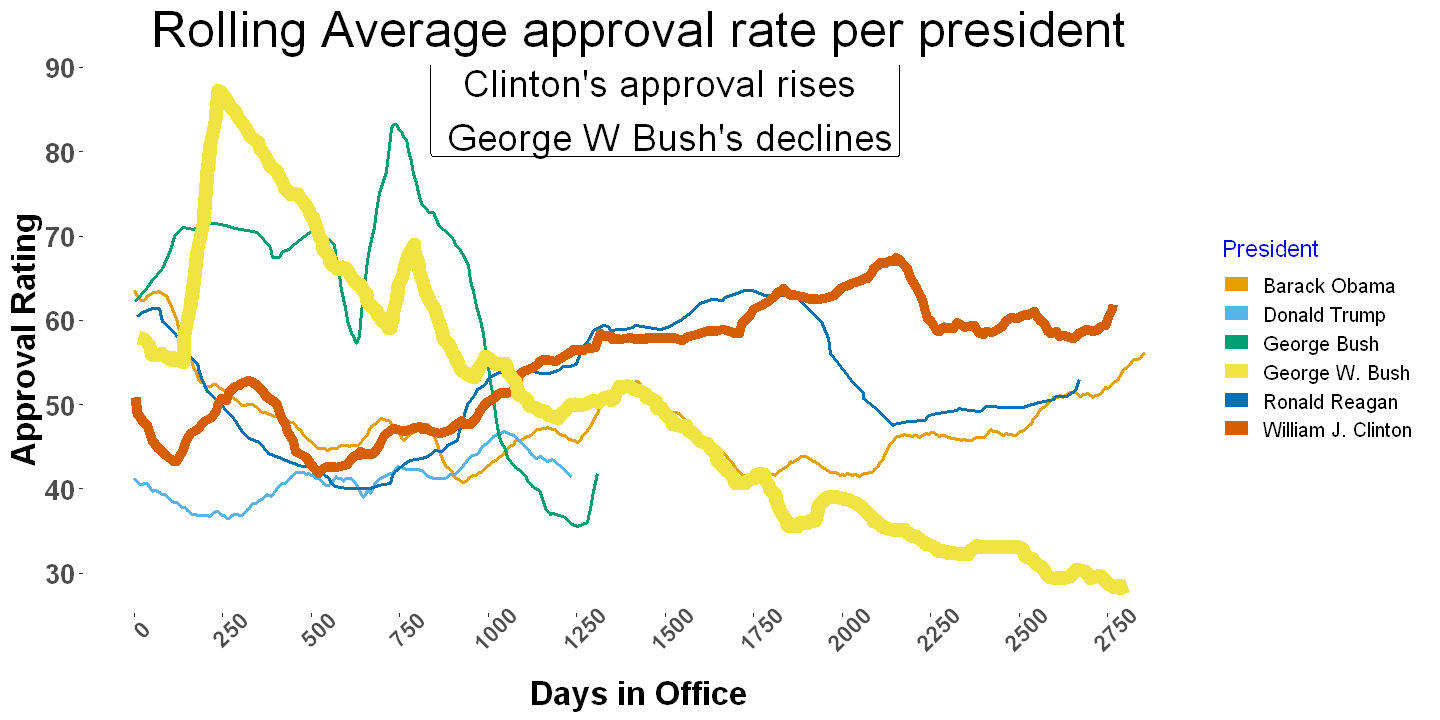

In [31]:
g = g + annotate("label", x=1500, y=85, label = "Clinton's approval rises \n George W Bush's declines", size=8) 
g